#Дипломная работа

Преподаватель: Ибрагим Мергалиев
Итоговая работа по курсу «Python и математика для анализа данных»

Проектная работа по модулю “Математика и статистика в Python”
1.Загрузить файл hr.csv.
2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [119]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import requests
import seaborn as sns
import statistics
from sklearn import preprocessing
import sys
from scipy.stats import pearsonr
import pylab
import math

In [2]:
#1.Загрузить файл hr.csv
data=pd.read_csv('hr.csv')
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
#2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
# Проверяю на отсуствующие занчения
data.info()
print()

# Подготовка данных. Присвоение класса методом one-hot-encoding
print(data['sales'].unique())
print()
print(data['salary'].unique())

data['Department'] = data['sales']
data.loc[data['sales'] == 'sales', 'Department'] = 0
data.loc[data['sales'] == 'accounting', 'Department'] = 1
data.loc[data['sales'] == 'hr', 'Department'] = 2
data.loc[data['sales'] == 'technical', 'Department'] = 3
data.loc[data['sales'] == 'support', 'Department'] = 4
data.loc[data['sales'] == 'management', 'Department'] = 5
data.loc[data['sales'] == 'IT', 'Department'] = 6
data.loc[data['sales'] == 'product_mng', 'Department'] = 7
data.loc[data['sales'] == 'marketing', 'Department'] = 8
data.loc[data['sales'] == 'RandD', 'Department'] = 9

data['salary_level'] = data['salary']
data.loc[data['salary'] == 'low', 'salary_level'] = 0
data.loc[data['salary'] == 'medium', 'salary_level'] = 1
data.loc[data['salary'] == 'high', 'salary_level'] = 2

data.head()
print()
data_new = data.drop(['sales','salary'], axis=1)
print()
data_new.info()
print()
data_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

['low' 'medium' 'high']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_level
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [4]:
#Среднее значение

data_meam = pd.DataFrame(data=None, index = ['mean_value'], columns=list(data_new))

for items_ in list(data_new):
    data_meam[items_].mean_value = statistics.mean(data_new[items_])
data_meam

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_level
mean_value,0.612834,0.716102,3.80305,201.05,3.49823,0.14461,0.238083,0.0212681,3.33982,0.594706


In [5]:
#медиана

data_median = pd.DataFrame(data=None, index = ['median_value'],columns=list(data_new))

for items_ in list(data_new):
    data_median[items_].median_value = statistics.median(data_new[items_])
data_median

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_level
median_value,0.64,0.72,4,200,3,0,0,0,3,1


In [6]:
#Мода
data_mode = pd.DataFrame(list(data_new))
data_mode = data_new.drop(['Department','salary_level'], axis=1)

# Создаём пустой словарь, в котором будем считать количество появлений значений продолжительности фильма
counts = {}
for items_ in list(data_mode) :
    for p in data_mode[items_] :
        if p not in counts:
            counts[p] = 1
        else:
            counts[p] += 1

maxp = 0
data_mode = None
for k, v in counts.items():
    if maxp < v:
        maxp = v
        data_mode = k
print('Значение моды: ', data_mode, 'Количество встречаемости: ', maxp)          


Значение моды:  0 Количество встречаемости:  38938


In [7]:
#MIN и MAX
data_min_max = pd.DataFrame(data=None, index = [['MIN', 'MAX']],columns=list(data_new))
data_min_max

for items_ in list(data_new):
    data_min_max[items_].MIN = min(data_new[items_])
    data_min_max[items_].MAX = max(data_new[items_])
    
#data_min_max[min_][1] = 100
data_min_max

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_level
MIN,0.09,0.36,2,96,2,0,0,0,0,0
MAX,1,1,7,310,10,1,1,1,9,2


In [8]:
#Cтандартное отклонение

data_pstdev = pd.DataFrame(data=None, index = ['St_deviation'],columns=list(data_new))
data_pstdev

for items_ in list(data_new):
    data_pstdev[items_].St_deviation = statistics.pstdev(data_new[items_])    
 
data_pstdev

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_level
St_deviation,0.248622,0.171163,1.23255,49.9414,1.46009,0.351707,0.42591,0.144277,2.82074,0.637162


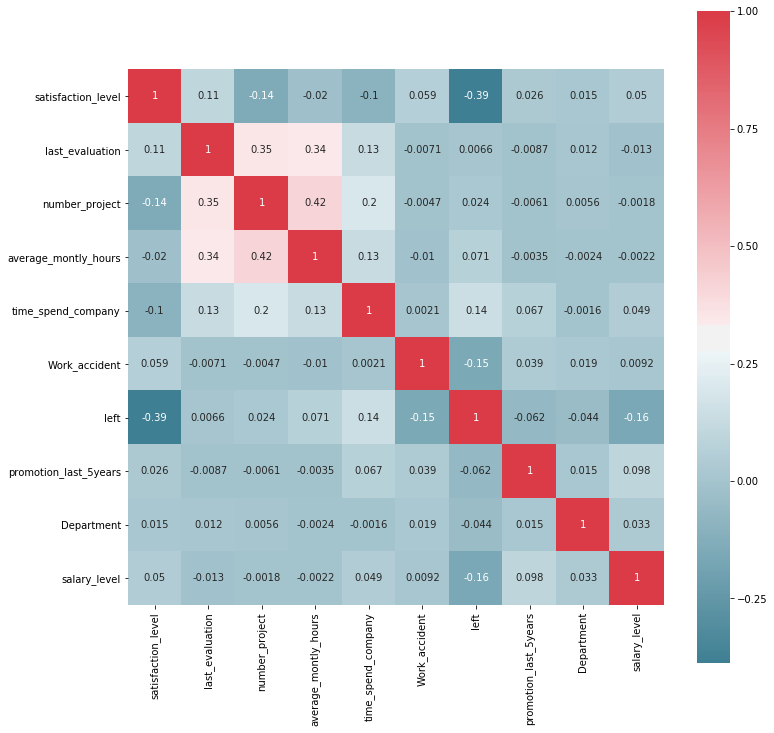

In [9]:
#Рассчитать и визуализировать корреляционную матрицу для переменных

# нормализация значений
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(data_new)

data_new_norm = pd.DataFrame(np_scaled, columns=list(data_new))

#матрица корреляций 
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data_new_norm.corr(), mask=np.zeros_like(data_new_norm.corr(), dtype=np.bool), annot=True, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

#sns.heatmap(data_new_norm.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
#fig=plt.gcf()
#fig.set_size_inches(14,14)
#plt.show()

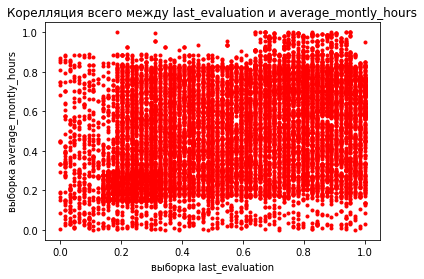

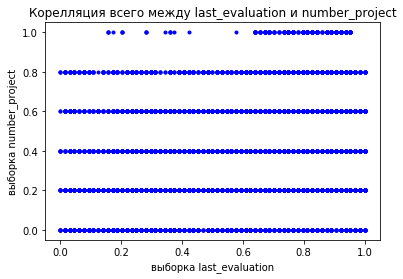

In [10]:
#4.Визуализировать несколько взаимосвязей между переменными.

#Корелляция всего между last_evaluation и average_montly_hours
plt.plot(data_new_norm['last_evaluation'], data_new_norm['average_montly_hours'], 'r.')

plt.title('Корелляция всего между last_evaluation и average_montly_hours')
plt.xlabel('выборка last_evaluation')
plt.ylabel('выборка average_montly_hours')
plt.show()


#Корелляция всего между last_evaluation и number_project
plt.plot(data_new_norm['last_evaluation'], data_new_norm['number_project'], 'b.')

plt.title('Корелляция всего между last_evaluation и number_project')
plt.xlabel('выборка last_evaluation')
plt.ylabel('выборка number_project')
plt.show()

In [11]:
#С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

#t-критерий Стьюдента salary_level = 2 (высокая зарплата) от satisfaction_level по всем департаментам

sallev_sat_lev = data_new[data_new['salary_level'] == 0]['satisfaction_level']
t_test0 = stats.ttest_1samp(sallev_sat_lev, data_new['satisfaction_level'].mean())

sallev_sat_lev = data_new[data_new['salary_level'] == 1]['satisfaction_level']
t_test1 = stats.ttest_1samp(sallev_sat_lev, data_new['satisfaction_level'].mean())

sallev_sat_lev = data_new[data_new['salary_level'] == 2]['satisfaction_level']
t_test2 = stats.ttest_1samp(sallev_sat_lev, data_new['satisfaction_level'].mean())

print('Зависимость уровня удовлетворённости от уровня зарплаты low: \n', t_test0)
print('\n Зависимость уровня удовлетворённости от уровня зарплаты medium: \n', t_test1)
print('\n Зависимость уровня удовлетворённости от уровня зарплаты high: \n', t_test2)

print('\n p-value наиболее близкое у 1. Следовательно можно сказать, что наиболее довольные работники имеющие среднюю зарплату')

Зависимость уровня удовлетворённости от уровня зарплаты low: 
 Ttest_1sampResult(statistic=-4.058538121602221, pvalue=4.9895149767038095e-05)

 Зависимость уровня удовлетворённости от уровня зарплаты medium: 
 Ttest_1sampResult(statistic=2.9429521364929117, pvalue=0.0032625787024487714)

 Зависимость уровня удовлетворённости от уровня зарплаты high: 
 Ttest_1sampResult(statistic=3.82059975018617, pvalue=0.00013974368695866474)

 p-value наиболее близкое у 1. Следовательно можно сказать, что наиболее довольные работники имеющие среднюю зарплату


In [12]:
#t-критерий Стьюдента salary_level = 2 (высокая зарплата) от satisfaction_level по всем департаментам

happy_pers = data_new.loc[(data_new['satisfaction_level'] > 0.8) & (data['sales'] == 'RandD') ]['left']

unhappy_pers = data_new.loc[(data_new['satisfaction_level'] < 0.5) & (data['sales'] == 'RandD')]['left']
stats.ttest_1samp(happy_pers, unhappy_pers)

#Очевидно, что при уровене удовлетворения 0,8 сотрудники в департаменте RandD увольняются реже


Ttest_1sampResult(statistic=301     -45.336835
302     -45.336835
303     -45.336835
305     -45.336835
453     -45.336835
454     -45.336835
455     -45.336835
606     -45.336835
607     -45.336835
608     -45.336835
609     -45.336835
835     -45.336835
836     -45.336835
837     -45.336835
985     -45.336835
986     -45.336835
987     -45.336835
989     -45.336835
1061    -45.336835
1063    -45.336835
1064    -45.336835
1065    -45.336835
1218    -45.336835
1291    -45.336835
1292    -45.336835
1294    -45.336835
1295    -45.336835
1296    -45.336835
1368    -45.336835
1369    -45.336835
           ...    
12606   -45.336835
12607   -45.336835
12608   -45.336835
12609   -45.336835
12893     4.808452
12966     4.808452
12967     4.808452
13043     4.808452
13199     4.808452
13200     4.808452
13213     4.808452
13216     4.808452
13392     4.808452
13393     4.808452
13870     4.808452
13872     4.808452
14512   -45.336835
14513   -45.336835
14514   -45.336835
14516   -45.336835
146

In [13]:
#Задание решаю двумя способами: 
#1) через количество отрботанных часов. Гипотеза: переаботок нет, сотрудник работает 8 часов в день;
#2) прямой подсчёт; считаю, что количество строк равно количеству персонала
# в обоих случаях, вычитаю количество уволенных
#подсчёт по департаментам

#6.Рассчитать сколько работников работает в каждом департаменте.

#количество рабочих дней в неделе
work_days = 5

#количество рабочих часов в дне
work_hours = 8

#количество рабочих часов в неделе
week_hours = work_hours * work_days

#количество рабочих недель в месяце
week_in_month = 4

#количество рабочих часов в месяце
work_hours_month = week_hours * week_in_month

data_persons = pd.DataFrame(data=None,index = data['sales'].unique(), columns = ['Number_of_employees'])

for dep in data_persons.index:  
    #подсчёт суммарног количества сотрудников по департаментам за всё время
    all_pers = int((data.loc[data['sales'] == dep].average_montly_hours.sum())/(work_hours_month))
    
    #подсчёт суммарног количества уволившихся сотрудников по департаментам
    left_pers = data.loc[data['sales'] == dep].left.sum()
    
    #подсчёт разницы между суммарным количеством и уволенными. Получаем число сотрудников, работающих в настоящий момент
    data_persons['Number_of_employees'].dep = all_pers - left_pers
        
    #записываем результат в df
    data_persons.loc[ dep , : ] = all_pers - left_pers
    
data_persons.head(10)

,Number_of_employees
sales,4184
accounting,760
hr,702
technical,2745
support,2241
management,701
IT,1277
product_mng,929
marketing,866
RandD,866


In [14]:
data_persons = pd.DataFrame(data=None,index = data['sales'].unique(), columns = ['Number_of_employees'])

for dep in data_persons.index:  
      
    #подсчёт суммарног количества сотрудников по департаментам за всё время
    all_pers = data.loc[data['sales'] == dep].average_montly_hours.count()
    
    #подсчёт суммарног количества уволившихся сотрудников по департаментам
    left_pers = data.loc[data['sales'] == dep].left.sum()
    
    #подсчёт разницы между суммарным количеством и уволенными. Получаем число сотрудников, работающих в настоящий момент
    data_persons['Number_of_employees'].dep = all_pers - left_pers
        
    #записываем результат в df
    data_persons.loc[ dep , : ] = all_pers - left_pers
    
data_persons

#Очевидно, что есть разница в количестве сотрудников, то есть в компаии есть переработки

,Number_of_employees
sales,3126
accounting,563
hr,524
technical,2023
support,1674
management,539
IT,954
product_mng,704
marketing,655
RandD,666


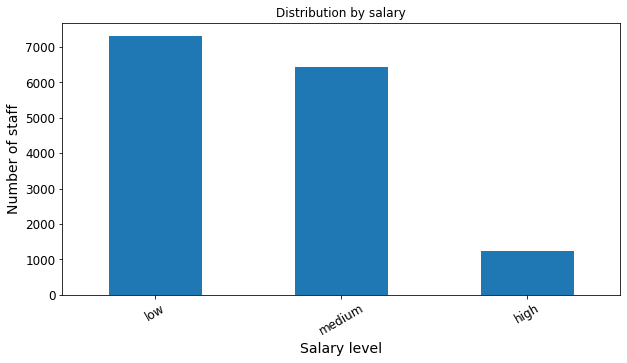

In [15]:
#7.Показать распределение сотрудников по зарплатам.

data_salary_distrid = pd.DataFrame(data=None, index = data_new['salary_level'].unique(), columns = ['Count_pers', 'label_salary_level'])
data_salary_distrid['label_salary_level'] = data['salary'].unique()

for i in data_salary_distrid.index :
    data_salary_distrid.loc[i]['Count_pers'] = len(data.loc[data_new['salary_level'] == i])
    
#строим график
ax = data_salary_distrid[['Count_pers','label_salary_level']].plot(kind='bar', title ='Distribution by salary',
                                                                   figsize=(10, 5), legend=False, fontsize=12)
ax.set_xlabel('Salary level', fontsize=14)
ax.set_ylabel('Number of staff', fontsize=14)

ax.set_xticklabels(data_salary_distrid['label_salary_level'], rotation = 30, fontsize=12)
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


             Number_of_employees  Salary_index_Department
sales                       3126                 0.557971
accounting                   563                 0.629726
hr                           524                 0.607578
technical                   2023                 0.569485
support                     1674                 0.549125
management                   539                 1.071429
IT                           954                 0.571312
product_mng                  704                 0.575388
marketing                    655                 0.624709
RandD                        666                 0.602287



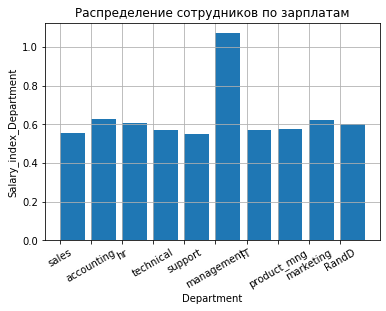

In [16]:
#8.Показать распределение сотрудников по зарплатам совместно с департаментами.

data_persons['Salary_index_Department'] = np.nan

for dep in data_persons.index:  

    data_persons['Salary_index_Department'].loc[dep] = data_new.loc[data['sales'] == dep]['salary_level'].mean()
    
print(data_persons)

print()

#строим график
data_plt_x = data_persons['Salary_index_Department']
data_plt_x_labels = data_persons.index

x = range(len(data_plt_x))
ax = plt.gca()
ax.bar(x, data_plt_x, align='edge')
ax.set_xticks(x)
ax.set_xticklabels(data_plt_x_labels, rotation = 30)
plt.grid(True)

plt.xlabel('Department')
plt.ylabel('Salary_index_Department')
plt.title('Распределение сотрудников по зарплатам')

plt.show()

In [17]:
#9.Сколько сотрудников покинули компанию.
print('Компанию покинуло: ', data_new['left'].sum(), ' сотрудников')

Компанию покинуло:  3571  сотрудников


        left_count left_count_per
low           2172        60.8233
medium        1317        36.8804
high            82        2.29628


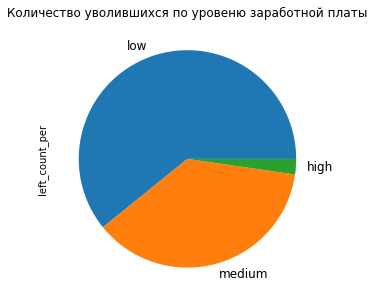

In [18]:
#10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

# А. Низкий уровень заработной платы
data_left_a = pd.DataFrame(data=None, index = data['salary'].unique(), columns = ['left_count','left_count_per'])

for l_count in data_left_a.index :
    data_left_a['left_count'].loc[l_count] = data.loc[data['salary'] == l_count]['left'].sum()

for l_count in data_left_a.index :
    data_left_a['left_count_per'].loc[l_count] = (data_left_a['left_count'].loc[l_count] *100) / data_left_a['left_count'].sum()
    
print(data_left_a)

#строим график
data_left_a['left_count_per'].plot(kind='pie', title ='Количество уволившихся по уровеню заработной платы',
                                                                   figsize=(10, 5), legend=False, fontsize=12)
plt.show()

# Можно сделать вывод, что большенство увольняется из-за низкой зарплаты

In [19]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

   nump_count  amh_count  hours_per_groupproject  hours_per_project  \
2        1567     229268                     147                 74   
3          72      15767                     219                 73   
4         409      98995                     243                 61   
5         612     149051                     244                 49   
6         655     176937                     271                 46   

   left_per_groupproject  
2                   1567  
3                     72  
4                    409  
5                    612  
6                    655  


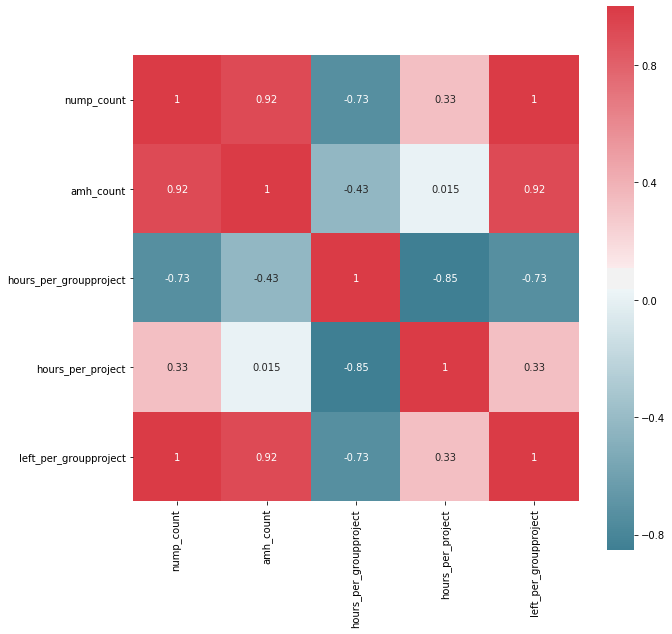

In [125]:
# B. Большая загрузка ( по всем департаментам)

#создаю рабочий датафрейм
data_left_b = data[['number_project', 'average_montly_hours', 'left']]
data_left_b.query('left == 1', inplace = True)
data_left_b.drop(['left'], axis = 1, inplace = True)
data_left_b.sort_index(inplace=True)

#создаю рабочий датафрейм для графиков
data_left_b_plt = pd.DataFrame(data = None, index = data_left_b['number_project'].unique(),
                               columns = ['nump_count', 'amh_count', 'hours_per_groupproject', 'hours_per_project', 'left_per_groupproject'])

# nump_count - количество проектов
# amh_count - суммарное среднее время по группе проектов (количество проектов в исходном датасете - в индексе df)
# hours_per_groupproject - сумма средних часов в месяц по группе проектов
# hours_per_project - количество часов на проект по  группе проектов
# left_per_groupproject - количество уволившихся по группе проектов 

for l_count in data_left_b_plt.index :
    data_left_b_plt['nump_count'].loc[l_count] = len(data_left_b.loc[data_left_b['number_project'] == l_count])
    data_left_b_plt['amh_count'].loc[l_count]= data_left_b.loc[data_left_b['number_project'] == l_count]['average_montly_hours'].sum()
    data_left_b_plt['hours_per_groupproject'].loc[l_count] = math.ceil(data_left_b_plt['amh_count'].loc[l_count] / data_left_b_plt['nump_count'].loc[l_count])
    data_left_b_plt['hours_per_project'].loc[l_count] = math.ceil((data_left_b_plt['hours_per_groupproject'].loc[l_count] / l_count))
    data_left_b_plt['left_per_groupproject'].loc[l_count] = len(data.loc[data.number_project == l_count][data.left == 1])
    
data_left_b_plt.sort_index(inplace=True)
print(data_left_b_plt.head())


# строю heatmap для определение кореляции данных
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_left_b_plt.corr(), mask=np.zeros_like(data_left_b_plt.corr(), dtype=np.bool), annot=True, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

#По df и heatmap видно, что 1) наибольшее количество проектов у сотрудника - 2, так же на них он тратит больше всего времени,
#чем сотрудники с 3 и более проектами; 2) большенство сотрудников ведущих 2 проекта увольняются; 
#3) есть большая кореляция уволившихся со среднем временем затраченным на проект иколичеством проектов
#Можно сделать вывод, что сотрудники увольняются из-за большой загрузки и переработок. 
# Вероятно компания экономит на ресурсах проекта и сотрудники быстро перегорают и покидают компанию.